
##  Convolutional Neural Network for Facial Recognition

### Overview:
This script demonstrates the implementation of a Convolutional Neural Network (CNN) for facial recognition using the LFW (Labeled Faces in the Wild) dataset. The model is built using TensorFlow and Keras, and it utilizes transfer learning with the MobileNetV2 architecture pretrained on ImageNet.

### Purpose:
The primary goal of this script is to showcase the process of building and training a CNN for facial recognition tasks. It covers essential steps such as data loading, preprocessing, model construction, training, evaluation, and visualization of results.

### Key Components:

1. **Data Loading and Preprocessing**:
   - Fetches the LFW dataset using the `fetch_lfw_people` function from scikit-learn.
   - Normalizes and preprocesses the images, including conversion to RGB format.

2. **Model Architecture**:
   - Utilizes MobileNetV2 as the base model, excluding the top classification layers.
   - Adds custom dense layers on top of the base model to adapt it for facial recognition.
   - Freezes the base model layers to prevent retraining.

3. **Model Training**:
   - Performs data augmentation using the `ImageDataGenerator` class from Keras.
   - Compiles the model with the Adam optimizer and sparse categorical crossentropy loss.
   - Fits the model to the training data, validating on a separate validation set.

4. **Model Evaluation**:
   - Evaluates the trained model on the test dataset to calculate loss and accuracy.
   - Visualizes the training history with plots of loss and accuracy over epochs.

5. **Result Visualization**:
   - Displays a sample of test images along with their true and predicted labels.

### Libraries Used:
- TensorFlow and Keras for deep learning model implementation.
- NumPy for numerical computations and array manipulations.
- Matplotlib for data visualization.
- scikit-learn for dataset loading and train-test splitting.

### Usage Instructions:
1. Ensure all necessary libraries are installed (`tensorflow`, `numpy`, `matplotlib`, `scikit-learn`).
2. Run the script in a Python environment compatible with the mentioned libraries.
3. Adjust hyperparameters or experiment with different model architectures as needed.
4. Monitor training progress through printed logs and visualizations.
5. Analyze model performance metrics such as accuracy and loss.
6. Interpret results and fine-tune the model for improved performance if necessary.

### External Resources:
- [LFW Dataset](http://vis-www.cs.umass.edu/lfw/)
- [MobileNetV2](https://arxiv.org/abs/1801.04381)

### Author:
- Ranjana Gautam

### Date:
- 03.06.2024


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras.layers import Dense
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
#loading data
lfw_people=fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X=lfw_people.images
y=lfw_people.target
target_names=lfw_people.target_names
n_classes=target_names.shape[0]


In [ ]:
# Normalizing the images
X=X/0.255
X=np.expand_dims(X,axis=-1)

In [ ]:
X = np.repeat(X[..., np.newaxis], 3, axis=-1)

# Ensure the shape is correct
print(f"Shape of the dataset (images): {X.shape}")


Shape of the dataset (images): (1288, 50, 37, 1, 3)


In [ ]:
# Reshape the dataset to remove the extra dimension
X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 3))
print(f"Shape of the dataset (images): {X.shape}")

Shape of the dataset (images): (1288, 50, 37, 3)


In [ ]:
# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# Load pre-trained MobileNetV2 model + higher level layers
base_model=MobileNetV2(weights="imagenet",include_top=False,input_shape=(50,37,3))

In [ ]:
# Adding custom layers on top of the base model
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation="relu")(x)
predictions=Dense(n_classes,activation="softmax")(x)

In [ ]:
#defining full model
model=Model(inputs=base_model.input,outputs=predictions)

In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 50, 37, 3)]          0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 25, 19, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 25, 19, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 25, 19, 32)           0         ['bn_Conv1[0][0]']        

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
# Fit the model
history=model.fit(datagen.flow(X_train,y_train,batch_size=32),
 validation_data=(X_test, y_test),
                    epochs=10)

Epoch 1/10
33/33 [==============================] - 11s 151ms/step - loss: 1.8511 - accuracy: 0.3282 - val_loss: 1.6098 - val_accuracy: 0.4961
Epoch 2/10
33/33 [==============================] - 4s 111ms/step - loss: 1.6397 - accuracy: 0.4126 - val_loss: 1.5076 - val_accuracy: 0.5116
Epoch 3/10
33/33 [==============================] - 5s 156ms/step - loss: 1.5728 - accuracy: 0.4369 - val_loss: 1.4518 - val_accuracy: 0.5116
Epoch 4/10
33/33 [==============================] - 4s 113ms/step - loss: 1.5330 - accuracy: 0.4340 - val_loss: 1.3435 - val_accuracy: 0.5194
Epoch 5/10
33/33 [==============================] - 5s 160ms/step - loss: 1.4571 - accuracy: 0.4670 - val_loss: 1.3192 - val_accuracy: 0.5078
Epoch 6/10
33/33 [==============================] - 4s 111ms/step - loss: 1.4047 - accuracy: 0.4932 - val_loss: 1.3598 - val_accuracy: 0.4922
Epoch 7/10
33/33 [==============================] - 4s 107ms/step - loss: 1.4299 - accuracy: 0.4592 - val_loss: 1.2443 - val_accuracy: 0.5504
Epoch

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

9/9 [==============================] - 1s 73ms/step - loss: 1.1852 - accuracy: 0.5775
Test accuracy: 0.5775


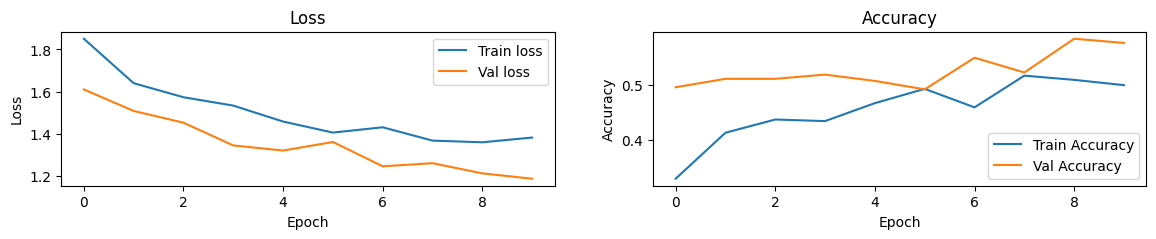

In [ ]:
# Plot training history
plt.figure(figsize=(14,2))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'],label="Val loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
# Add the second subplot for accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# Display the plots
plt.show()

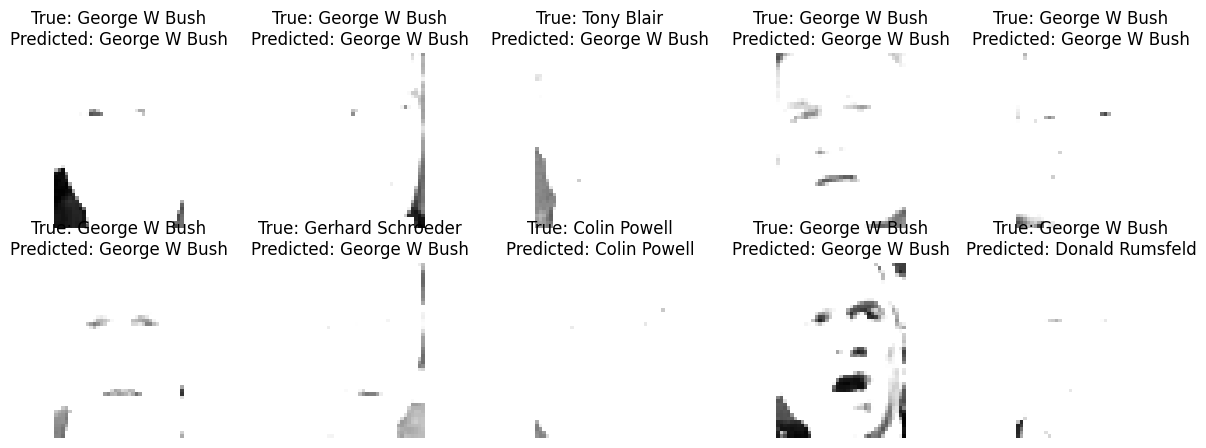

In [ ]:
def visualize_predictions(images, true_labels, pred_labels, target_names, n=10):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i])
        plt.title(f'True: {target_names[true_labels[i]]}\nPredicted: {target_names[pred_labels[i]]}')
        plt.axis('off')
    plt.show()

visualize_predictions(X_test, y_test, y_pred_classes, target_names)


9/9 [==============================] - 1s 64ms/step


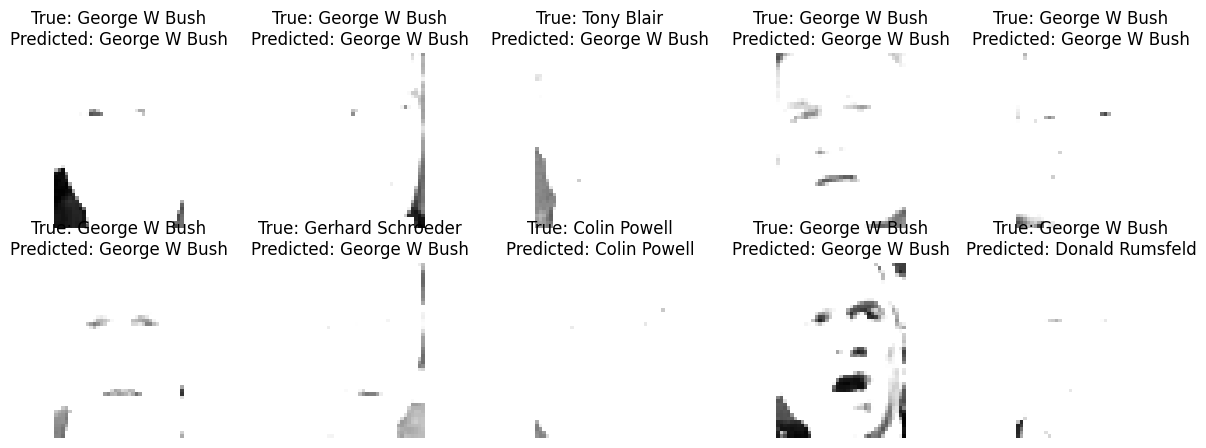

In [ ]:
# Get predictions
y_pred = model.predict(X_test)
# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Visualize predictions
visualize_predictions(X_test, y_test, y_pred_classes, target_names)


# **Thank you**